# Linear and Polynomial Regression

This code is provided as supplementary material of the lecture Machine Learning and Optimization in Communications (MLOC).<br>

This code illustrates
* Linear regression using Moores law
* Polynomial regression and illustration of over- and underfitting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import shutil

Read data from file and extract X and Y coordinates

In [2]:
data = np.genfromtxt('MooresLaw.txt', dtype=float, delimiter=' ', names=True) 
year = np.array([x[0] for x in data])
TrCount = np.array([x[1] for x in data])

Text(0, 0.5, '$\\log_{10}(\\textrm{Transistor Count})$')

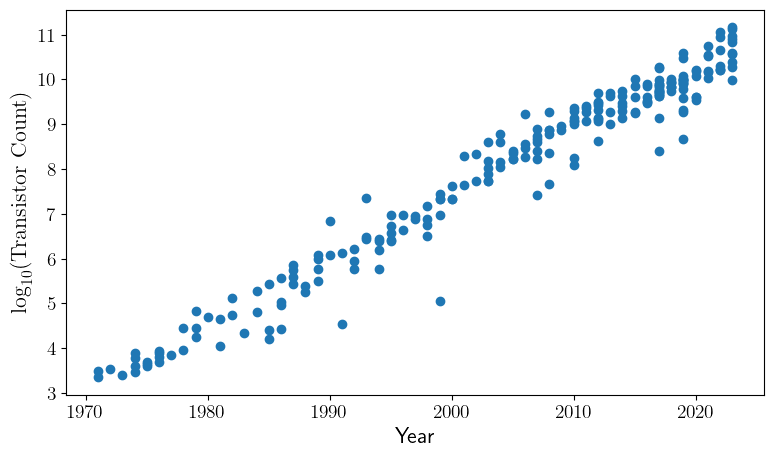

In [3]:
plt.figure(figsize=(9,5))
font = {'size'   : 14}
plt.rc('font', **font)
plt.rc('text', usetex=True if shutil.which('latex') else False)

plt.scatter(year, TrCount)
    
plt.xlabel(r'Year',fontsize=16)
plt.ylabel(r'$\log_{10}(\textrm{Transistor Count})$',fontsize=16)

Generate $\boldsymbol{X}^{[\mathsf{train}]}$ and $\boldsymbol{y}^{[\mathsf{train}]}$

In [4]:
X_train = np.column_stack((year, np.ones_like(year)))
y_train = TrCount

Obtain optimal parameters via
$$
\boldsymbol{\theta}^\star = \left((\boldsymbol{X}^{[\mathsf{train}]})^T \boldsymbol{X}^{[\mathsf{train}]}\right)^{-1}(\boldsymbol{X}^{[\mathsf{train}]})^T\boldsymbol{y}^{[\mathsf{train}]}
$$

In [5]:
theta_opt = np.linalg.inv(X_train.transpose() @ X_train) @ X_train.transpose() @ y_train

In [6]:
print(theta_opt)

[ 1.43731526e-01 -2.80103648e+02]


In [7]:
print('Every two years, the transistor count increases by a factor 10**(2 * %1.4f) = %1.4f' % (theta_opt[0], 10.0**(2.0*theta_opt[0])))

Every two years, the transistor count increases by a factor 10**(2 * 0.1437) = 1.9385


Text(0, 0.5, '$\\log_{10}(\\textrm{Transistor Count})$')

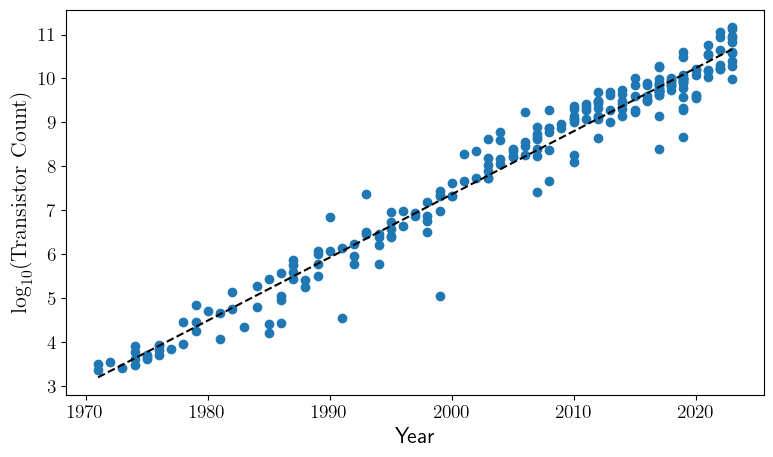

In [8]:
plt.figure(figsize=(9,5))
font = {'size'   : 14}
plt.rc('font', **font)
plt.rc('text', usetex=True if shutil.which('latex') else False)

plt.scatter(year, TrCount)
plt.plot(year, theta_opt[0]*year + theta_opt[1], linestyle='--', color='black')
    
plt.xlabel(r'Year',fontsize=16)
plt.ylabel(r'$\log_{10}(\textrm{Transistor Count})$',fontsize=16)

-----

Carry out another example illustrating polynomial regression with over and underfitting.

We use a training set with 9 data points taken from a noisy quadratic function. The test set contains 900 other values generating according to the same quadratic function.

In [9]:
x_train = np.random.rand(9,1)*3 + 4 - 1.5;
y_train = -x_train**2 + 8*x_train - 10 + 0.05*np.random.randn(9,1);

x_test = np.random.rand(900,1)*3 + 4 - 1.5;
y_test = -x_test**2 + 8*x_test - 10 + 0.05*np.random.randn(900,1)

x_eval = np.linspace(2,6,100)

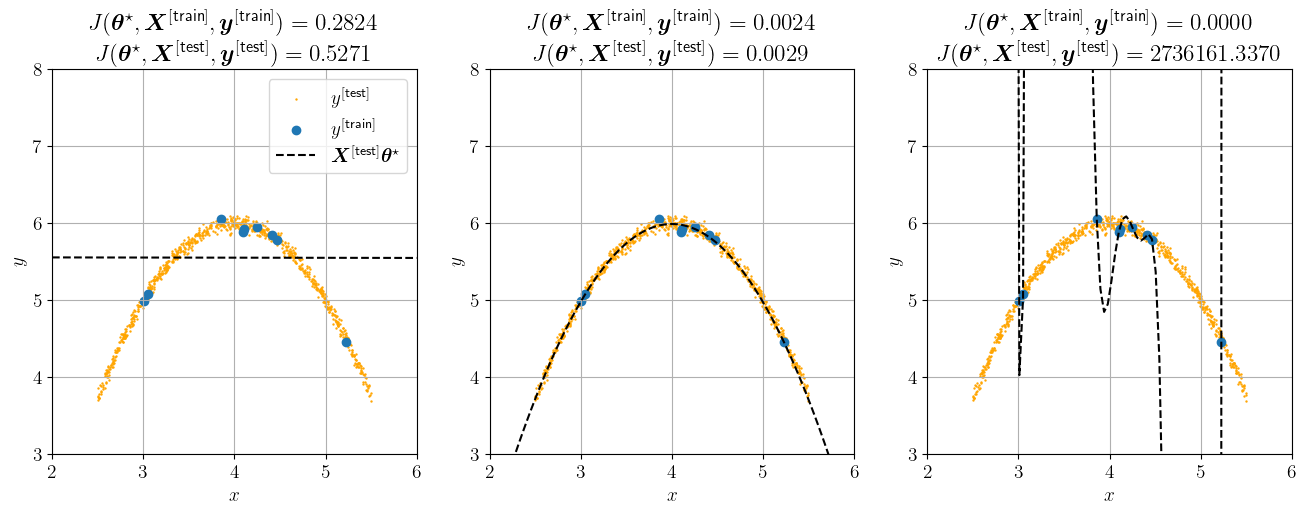

In [15]:
plt.figure(figsize=(16,5))
font = {'size'   : 14}
plt.rc('font', **font)
plt.rc('text', usetex=True if shutil.which('latex') else False)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{bm}')

for idx, m in enumerate([1,2,8]):
    # carry out polynomial regression using the training data
    X_train = np.ones_like(x_train)
    X_test = np.ones_like(x_test)
    X_eval = np.ones_like(x_eval)
    X = np.ones_like(x_eval)
    for k in range(m):
        X_train = np.column_stack((X_train, x_train ** (k+1)))
        X_test = np.column_stack((X_test, x_test ** (k+1)))
        X_eval = np.column_stack((X_eval, x_eval ** (k+1)))
        
    if m == (len(x_train)-1):
        # we can actually use the true matrix inversion if the polynomial order is equal to the number of training symbols
        # Using the pseudo-inverse should give the same result, however, due to numerical issues, this may not be the case if the matrix is not well-behaved, which is why we resort to the true inverse
        theta_opt = np.linalg.inv(X_train) @ y_train
    else:
        theta_opt = np.linalg.inv(X_train.transpose() @ X_train) @ X_train.transpose() @ y_train

    # evaluate training and test errors
    training_error = np.mean(np.square(y_train - X_train @ theta_opt))
    test_error = np.mean(np.square(y_test - X_test @ theta_opt))
    
    plt.subplot(1,3,idx+1)
    # Disable this line if you don't want to plot the test set
    plt.scatter(x_test, y_test,s=0.5,color='orange')    
    plt.scatter(x_train, y_train)    
    plt.plot(x_eval, X_eval @ theta_opt, linestyle='--', color='black')
    plt.xlim((2,6))
    plt.ylim((3,8))
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    if idx == 0:        
        plt.legend([r'$y^{[\mathsf{test}]}$',r'$y^{[\mathsf{train}]}$',r'$\bm{X}^{[\mathsf{test}]}\bm{\theta}^{\star}$'])
    plt.grid()
    plt.title(r'$J(\bm{\theta}^{\star}, \bm{X}^{[\mathsf{train}]}, \bm{y}^{[\mathsf{train}]}) = %1.4f$' % training_error + '\n' +  r'$J(\bm{\theta}^{\star}, \bm{X}^{[\mathsf{test}]}, \bm{y}^{[\mathsf{test}]}) = %1.4f$' % test_error)